<a href="https://colab.research.google.com/github/whsu00/project/blob/master/Plotting_12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_file(file_path):
  log_file = pd.read_csv(file_path, sep= '\t')
  #Backfill blank values (Discriminator Only Updates Every 2 Epochs)
  log_file['LogProbabilityContext'] = log_file['LogProbabilityContext'].replace(to_replace = 0, method='bfill')
  log_file['DecoderAccuracy'] = log_file['DecoderAccuracy'].replace(to_replace = 0, method='bfill')
  log_file['LossDC'] = log_file['LossDC'].replace(to_replace = 0, method='bfill')
  log_file['DeltaLossDC'] = log_file['DeltaLossDC'].replace(to_replace = 0, method='bfill')
  return log_file

In [ ]:
def create_line_graph(df, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  if type(plotCol) != list:
    sns.lineplot(x = df['Epoch'], y = df[plotCol], label = legendTxt)
  else:
    for i in range(len(plotCol)):
      sns.lineplot(x = df['Epoch'], y = df[plotCol[i]], label = legendTxt[i])
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

In [ ]:
def create_line_graph_three_datasets(df, df2, df3, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  sns.lineplot(x = df['Epoch'], y = df[plotCol], label = legendTxt[0])
  sns.lineplot(x = df2['Epoch'], y = df2[plotCol], label = legendTxt[1])
  sns.lineplot(x = df3['Epoch'], y = df3[plotCol], label = legendTxt[2])
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

In [ ]:
def create_line_graph_two_datasets(df, df2, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  sns.lineplot(x = df['Epoch'], y = df[plotCol], label = legendTxt[0])
  sns.lineplot(x = df2['Epoch'], y = df2[plotCol], label = legendTxt[1])
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

In [ ]:
def create_smooth_line_graph(df, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  x, y = df['Epoch'], df[plotCol]
  z = np.polyfit(x, y, 20)
  p = np.poly1d(z)
  xp = np.linspace(0, 1000)
  sns.lineplot(xp, p(xp), label = legendTxt[0])
  #sns.lineplot(x = df2['Epoch'], y = df2[plotCol], label = legendTxt[1])
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

In [10]:
def create_smooth_line_three_datasets_graph(df, df2, df3, plotCol, x_label, y_label, title, legendTxt):
  fig = plt.figure(figsize=(20,8))
  dflst = [df, df2, df3]
  for i in range(3):
    x, y = dflst[i]['Epoch'], dflst[i][plotCol]
    z = np.polyfit(x, y, 20)
    p = np.poly1d(z)
    xp = np.linspace(0, 1000)
    sns.lineplot(xp, p(xp), label = legendTxt[i])
    
  axis_font = {'fontname':'Times', 'size':'15'}
  title_font = {'fontname':'Times', 'size':'20'}
  plt.xlabel(x_label, **axis_font)
  plt.ylabel(y_label, **axis_font)
  plt.legend(prop={'size': 16})
  plt.title(title, **title_font)

In [ ]:
def create_moving_average_graph(df, plotCol, x_label, y_label, title, legendTxt):
  

In [ ]:
cd cs285_graphs

[Errno 2] No such file or directory: 'cs285_graphs'
/content/drive/MyDrive/cs285_graphs


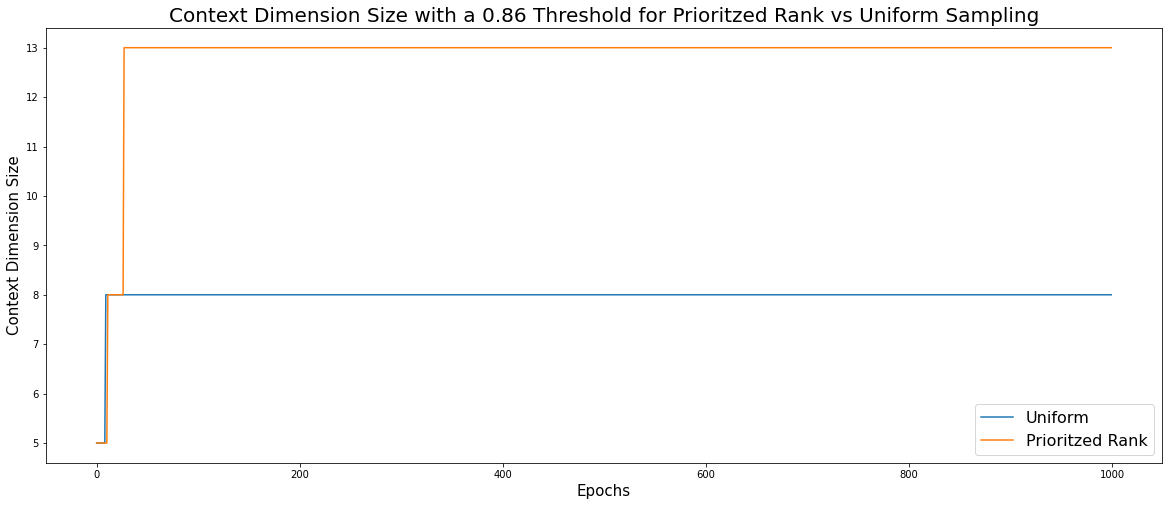

In [ ]:
high_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt")
high_thresh_per_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
create_line_graph_two_datasets(df = high_thresh_file, df2 = high_thresh_per_file, plotCol= 'ContextDim', x_label = 'Epochs', y_label = 'Context Dimension Size', title = 'Context Dimension Size with a 0.86 Threshold for Prioritzed Rank vs Uniform Sampling', legendTxt=['Uniform', 'Prioritzed Rank'])
plt.savefig("Context_Dim_Size_0.86.png")

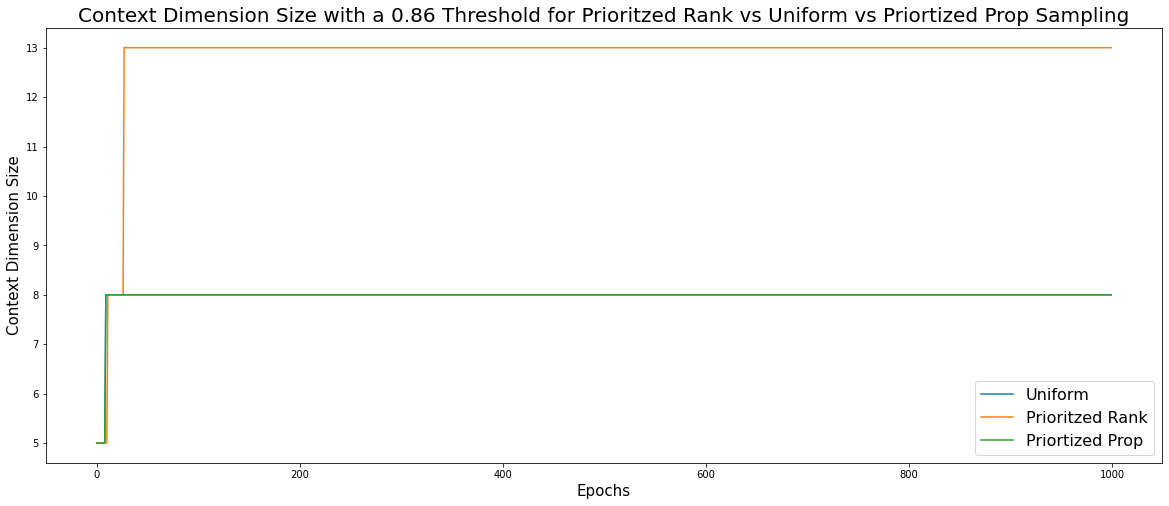

In [ ]:
high_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt")
high_thresh_per_rank_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
high_thresh_per_prop_file = get_file("/content/drive/MyDrive/proj_curr_version/project/data/valor_prop_0.85/valor_prop_0.85_s0/progress.txt")
create_line_graph_three_datasets(df = high_thresh_file, df2 = high_thresh_per_file, df3 = high_thresh_per_prop_file, plotCol= 'ContextDim', x_label = 'Epochs', y_label = 'Context Dimension Size', title = 'Context Dimension Size with a 0.86 Threshold for Prioritzed Rank vs Uniform vs Priortized Prop Sampling', legendTxt=['Uniform', 'Prioritzed Rank', 'Priortized Prop'])
plt.savefig("Context_Dim_Size_0.86_3.png")

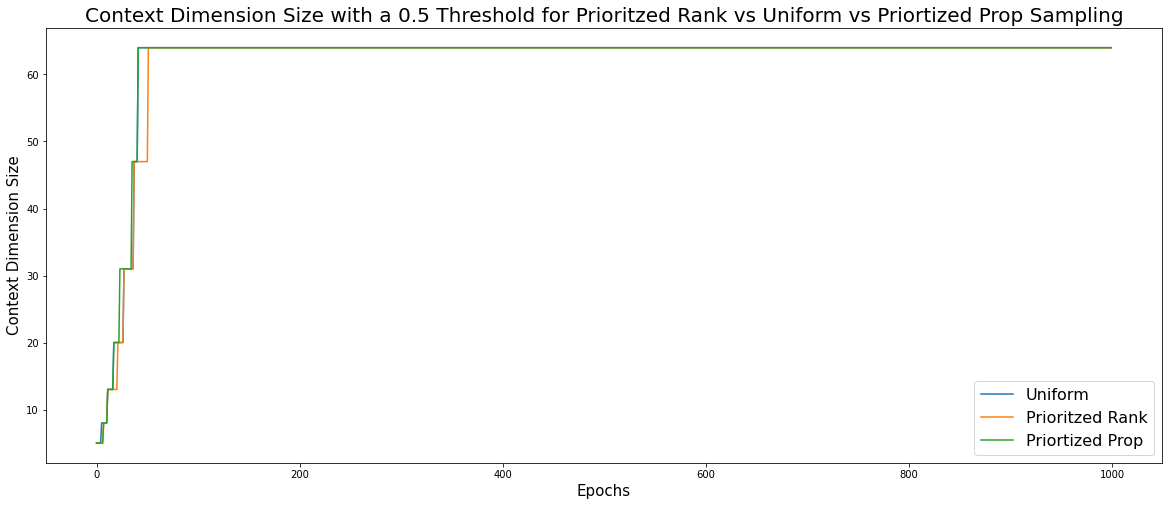

In [ ]:
low_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/plain_valor_0.5/plain_valor_0.5_s0/progress.txt")
low_thresh_per_rank_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_cur_per_log_exp/valor_cur_per_log_exp_s0/progress.txt")
low_thresh_per_prop_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_prop_0.5/valor_prop_0.5_s0/progress.txt")
create_line_graph_three_datasets(df = low_thresh_file, df2 = low_thresh_per_rank_file, df3 = low_thresh_per_prop_file,  plotCol= 'ContextDim', x_label = 'Epochs', y_label = 'Context Dimension Size', title = 'Context Dimension Size with a 0.5 Threshold for Prioritzed Rank vs Uniform vs Priortized Prop Sampling', legendTxt=['Uniform', 'Prioritzed Rank', 'Priortized Prop'])
plt.savefig("Context_Dim_Size_0.5.png")

In [ ]:
low_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/plain_valor_0.5/plain_valor_0.5_s0/progress.txt")
low_thresh_per_rank_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_cur_per_log_exp/valor_cur_per_log_exp_s0/progress.txt")
low_thresh_per_prop_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_prop_0.5/valor_prop_0.5_s0/progress.txt")
create_line_graph_two_datasets(df = low_thresh_file, df2 = low_thresh_per_rank_file,  plotCol= 'ContextDim', x_label = 'Epochs', y_label = 'Number of Contexts', title = 'Number of Contexts with a 0.5 Threshold for Prioritzed Rank vs Uniform Sampling', legendTxt=['Uniform', 'Prioritzed Rank'])
plt.savefig("Context_Dim_Size_0.5_2.png")

NameError: ignored

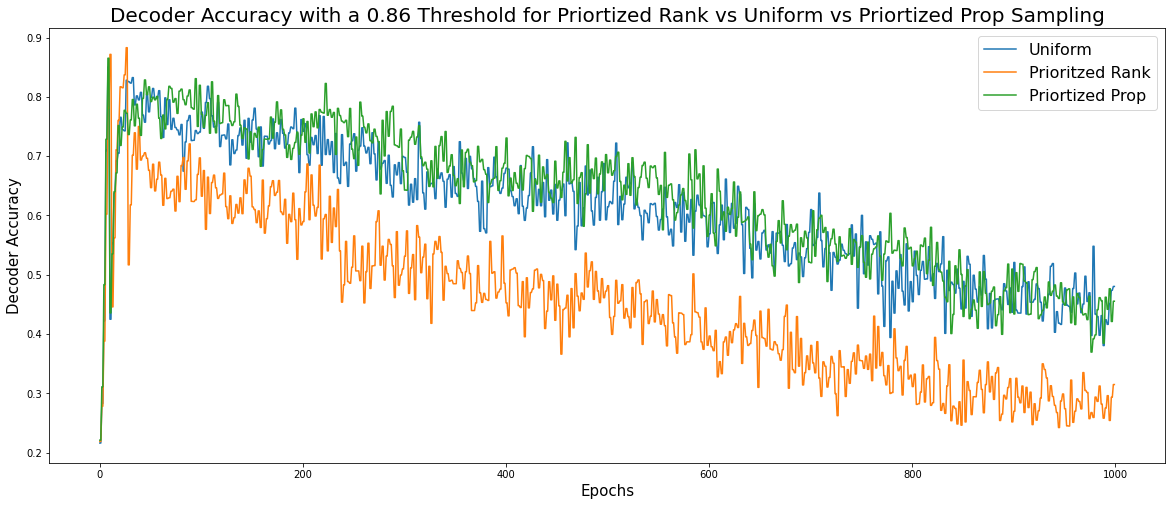

In [ ]:
high_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt")
high_thresh_per_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
high_thresh_per_prop_file = get_file("/content/drive/MyDrive/proj_curr_version/project/data/valor_prop_0.85/valor_prop_0.85_s0/progress.txt")
create_line_graph_three_datasets(df = high_thresh_file, df2 = high_thresh_per_file, df3 = high_thresh_per_prop_file, plotCol= 'DecoderAccuracy', x_label = 'Epochs', y_label = 'Decoder Accuracy', title = 'Decoder Accuracy with a 0.86 Threshold for Priortized Rank vs Uniform vs Priortized Prop Sampling', legendTxt=['Uniform', 'Prioritzed Rank', 'Priortized Prop'])
plt.savefig("Decoder_Accuracy_0.85_Tresh_3.png")

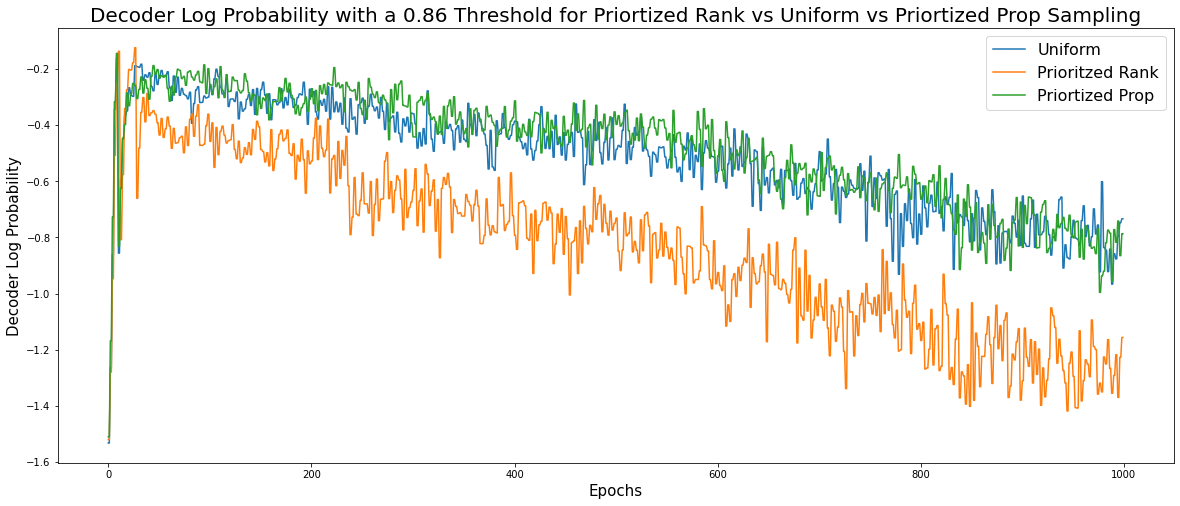

In [ ]:
high_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt")
high_thresh_per_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
high_thresh_per_prop_file = get_file("/content/drive/MyDrive/proj_curr_version/project/data/valor_prop_0.85/valor_prop_0.85_s0/progress.txt")
create_line_graph_three_datasets(df = high_thresh_file, df2 = high_thresh_per_file, df3 = high_thresh_per_prop_file, plotCol= 'LogProbabilityContext', x_label = 'Epochs', y_label = 'Decoder Log Probability', title = 'Decoder Log Probability with a 0.86 Threshold for Priortized Rank vs Uniform vs Priortized Prop Sampling', legendTxt=['Uniform', 'Prioritzed Rank', 'Priortized Prop'])
plt.savefig("Decoder_Log_Probability_0.85_Tresh_3.png")

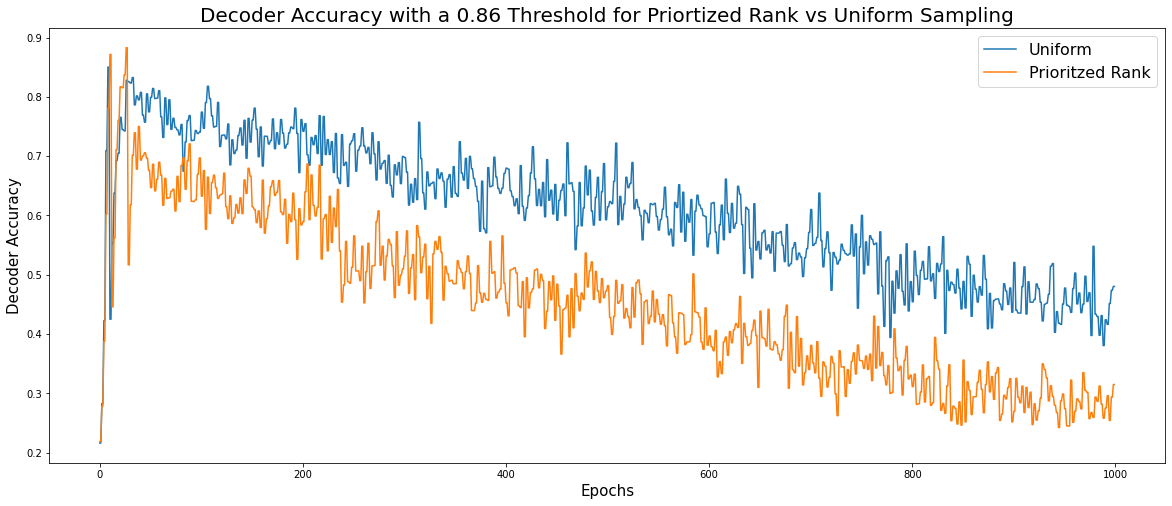

In [ ]:
high_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt")
high_thresh_per_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
create_line_graph_two_datasets(df = high_thresh_file, df2 = high_thresh_per_file, plotCol= 'DecoderAccuracy', x_label = 'Epochs', y_label = 'Decoder Accuracy', title = 'Decoder Accuracy with a 0.86 Threshold for Priortized Rank vs Uniform Sampling', legendTxt=['Uniform', 'Prioritzed Rank'])
plt.savefig("Decoder_Accuracy_0.85_Tresh.png")

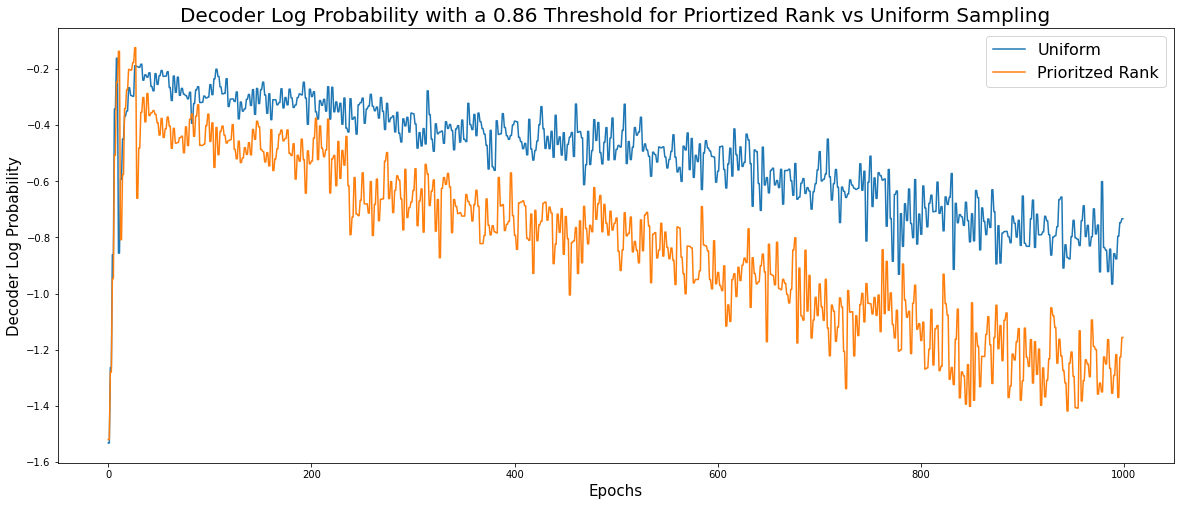

In [ ]:
high_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt")
high_thresh_per_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
create_line_graph_two_datasets(df = high_thresh_file, df2 = high_thresh_per_file, plotCol= 'LogProbabilityContext', x_label = 'Epochs', y_label = 'Decoder Log Probability', title = 'Decoder Log Probability with a 0.86 Threshold for Priortized Rank vs Uniform Sampling', legendTxt=['Uniform', 'Prioritzed Rank'])
plt.savefig("Log_Probability_0.85_Tresh.png")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


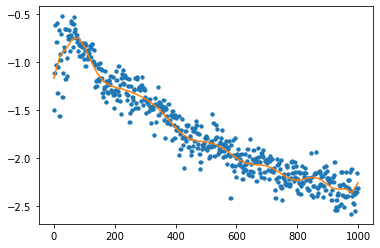

In [ ]:
x = low_thresh_file['Epoch']
y = low_thresh_file['LogProbabilityContext']
z = np.polyfit(x, y, 20)
p = np.poly1d(z)
xp = np.linspace(0, 1000)
#plt.plot(xp, p(xp))
plt.plot(x, y, '.', xp, p(xp), '-')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


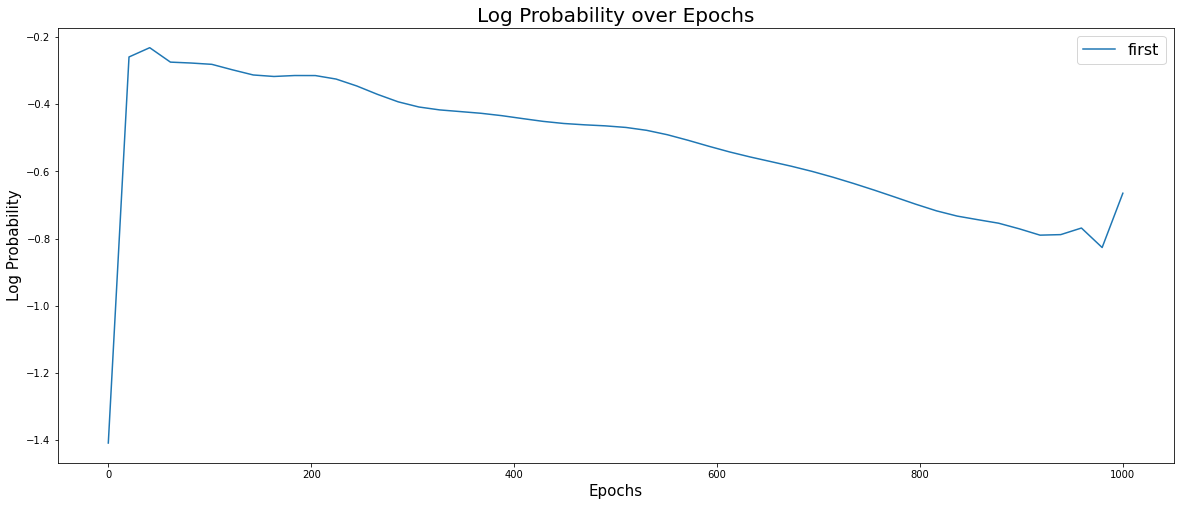

In [ ]:
create_smooth_line_graph(high_thresh_file, 'LogProbabilityContext', 'Epochs', 'Log Probability', 'Log Probability over Epochs', ['first'])

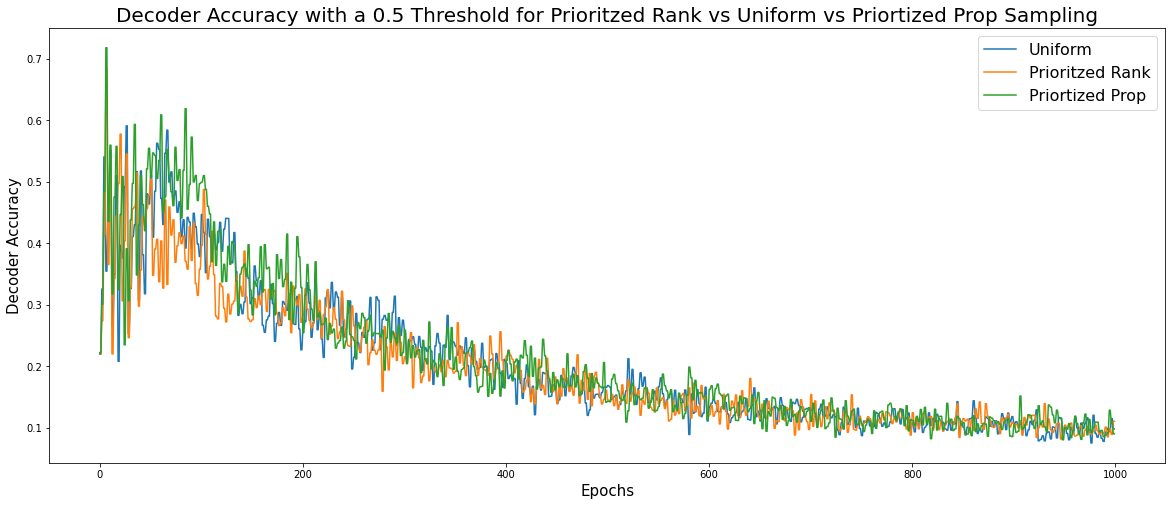

In [ ]:
low_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/plain_valor_0.5/plain_valor_0.5_s0/progress.txt")
low_thresh_per_rank_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_cur_per_log_exp/valor_cur_per_log_exp_s0/progress.txt")
low_thresh_per_prop_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_prop_0.5/valor_prop_0.5_s0/progress.txt")
create_line_graph_three_datasets(df = low_thresh_file, df2 = low_thresh_per_rank_file, df3 = low_thresh_per_prop_file,  plotCol= 'DecoderAccuracy', x_label = 'Epochs', y_label = 'Decoder Accuracy', title = 'Decoder Accuracy with a 0.5 Threshold for Prioritzed Rank vs Uniform vs Priortized Prop Sampling', legendTxt=['Uniform', 'Prioritzed Rank', 'Priortized Prop'])
plt.savefig("Decoder_Accuracy_0.5_Tresh.png")

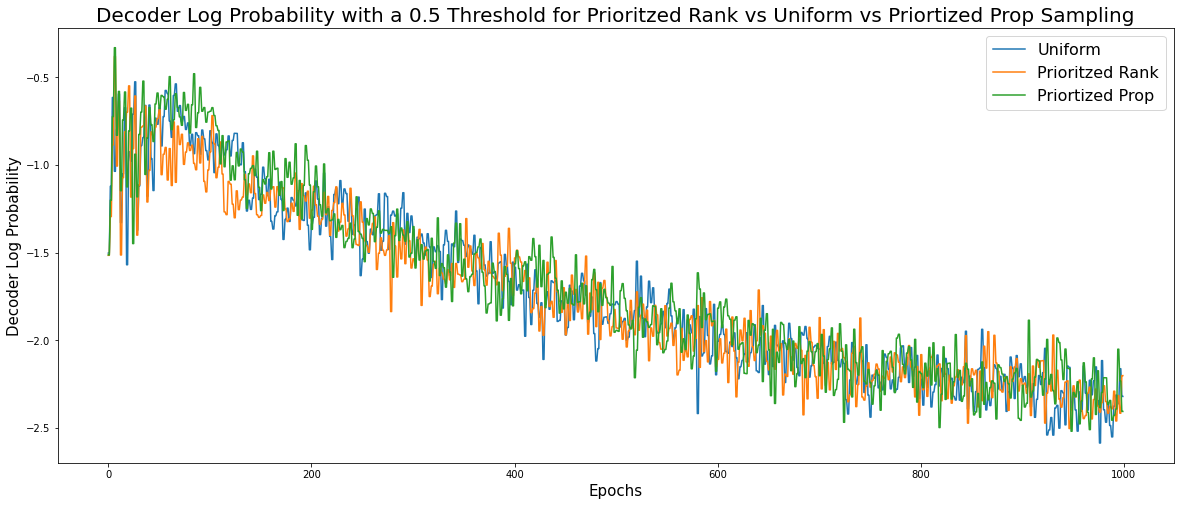

In [ ]:
low_thresh_file = get_file("/content/drive/MyDrive/cs285_data_v1/plain_valor_0.5/plain_valor_0.5_s0/progress.txt")
low_thresh_per_rank_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_cur_per_log_exp/valor_cur_per_log_exp_s0/progress.txt")
low_thresh_per_prop_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_prop_0.5/valor_prop_0.5_s0/progress.txt")
create_line_graph_three_datasets(df = low_thresh_file, df2 = low_thresh_per_rank_file, df3 = low_thresh_per_prop_file,  plotCol= 'LogProbabilityContext', x_label = 'Epochs', y_label = 'Decoder Log Probability', title = 'Decoder Log Probability with a 0.5 Threshold for Prioritzed Rank vs Uniform vs Priortized Prop Sampling', legendTxt=['Uniform', 'Prioritzed Rank', 'Priortized Prop'])
plt.savefig("Decoder_Log_Probability_0.5_Tresh.png")

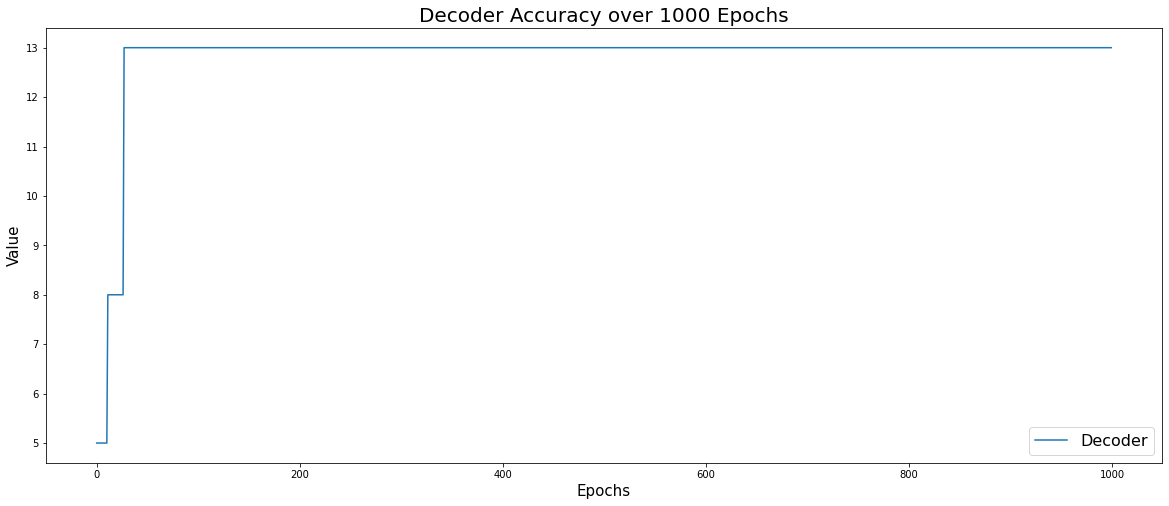

In [ ]:
log_file = get_file("/content/drive/MyDrive/cs285_data_v1/valor_high_thresh_per/valor_high_thresh_per_s0/progress.txt")
create_line_graph(df = log_file, plotCol= 'ContextDim', x_label = 'Epochs', y_label = 'Value', title = 'Decoder Accuracy over 1000 Epochs', legendTxt='Decoder')

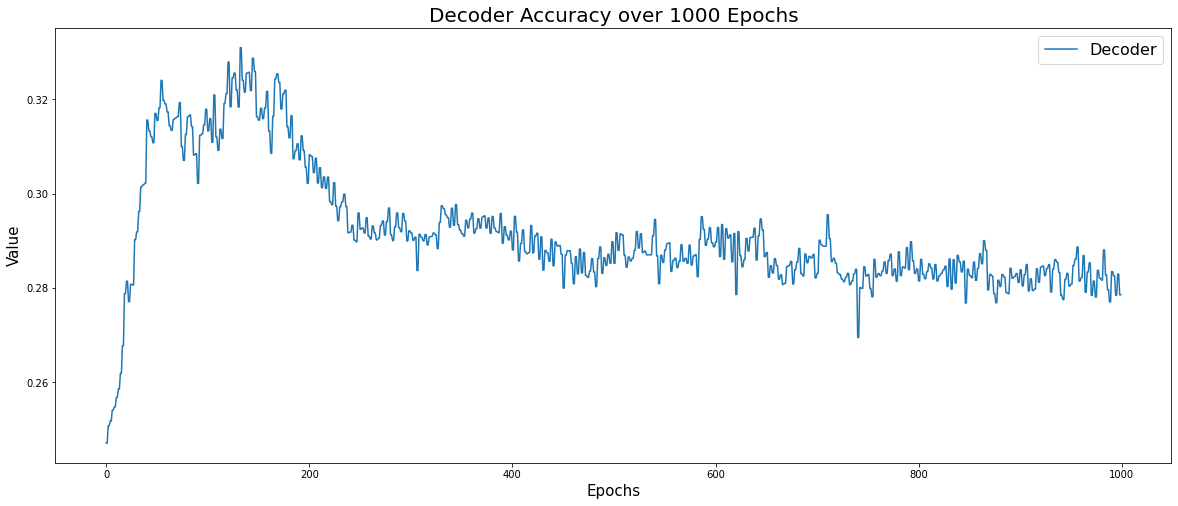

In [ ]:
# log_file = get_file('/content/drive/MyDrive/cs285_data_v1/valor_high_thresh/valor_high_thresh_s0/progress.txt')
log_file = get_file('https://pastebin.com/raw/bsr7HCkE')
create_line_graph(df = log_file, plotCol= 'DecoderAccuracy', x_label = 'Epochs', y_label = 'Value', title = 'Decoder Accuracy over 1000 Epochs', legendTxt='Decoder')

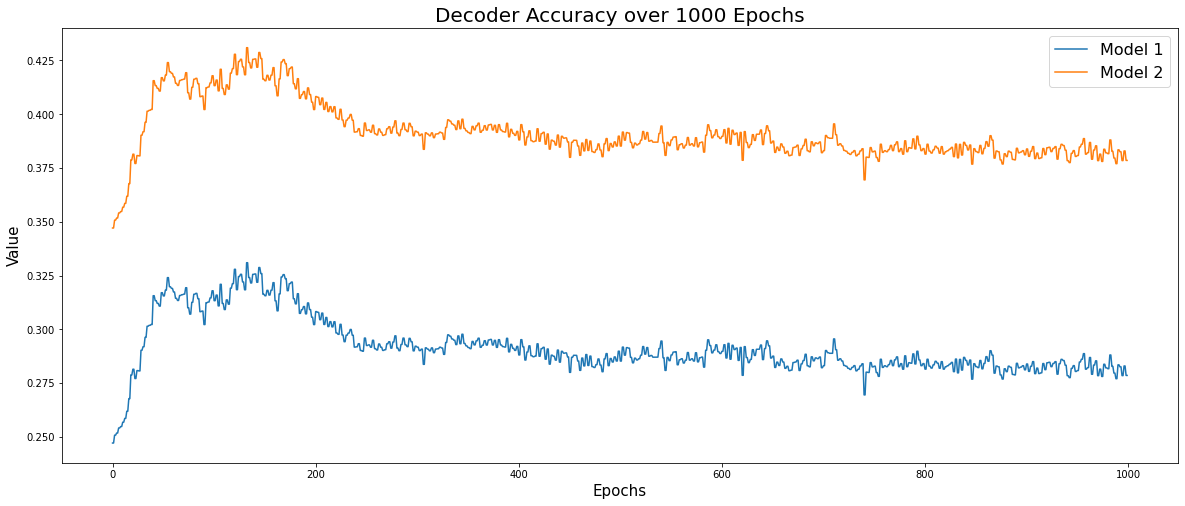

In [ ]:
df = pd.DataFrame({"Epoch":range(1000), "model1":log_file["DecoderAccuracy"], "model2":log_file["DecoderAccuracy"]+0.1})
create_line_graph(df = df, plotCol= ['model1', 'model2'], x_label = 'Epochs', y_label = 'Value', title = 'Decoder Accuracy over 1000 Epochs', legendTxt=['Model 1', 'Model 2'])